In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
song_scores = [0.007605, 0.163280, 0.159643, 0.123846, 0.000362, 0.004685]
tag_scores = [0.156291, 0.279056, 0.201424, 0.279056, 0.000036, 0.027438]
model = ["CBF-IDF", "User-Based CF-inter1", "User-Based CF-inter2" , "User-Based CF-rank", "BPR", "ALS"]
dic = {"models":model
      ,"songs":song_scores
      ,"tags":tag_scores}

results = pd.DataFrame(dic)

In [3]:
results

,models,songs,tags
0,CBF-IDF,0.007605,0.156291
1,User-Based CF-inter1,0.163280,0.279056
2,User-Based CF-inter2,0.159643,0.201424
3,User-Based CF-rank,0.123846,0.279056
4,BPR,0.000362,0.000036
5,ALS,0.004685,0.027438


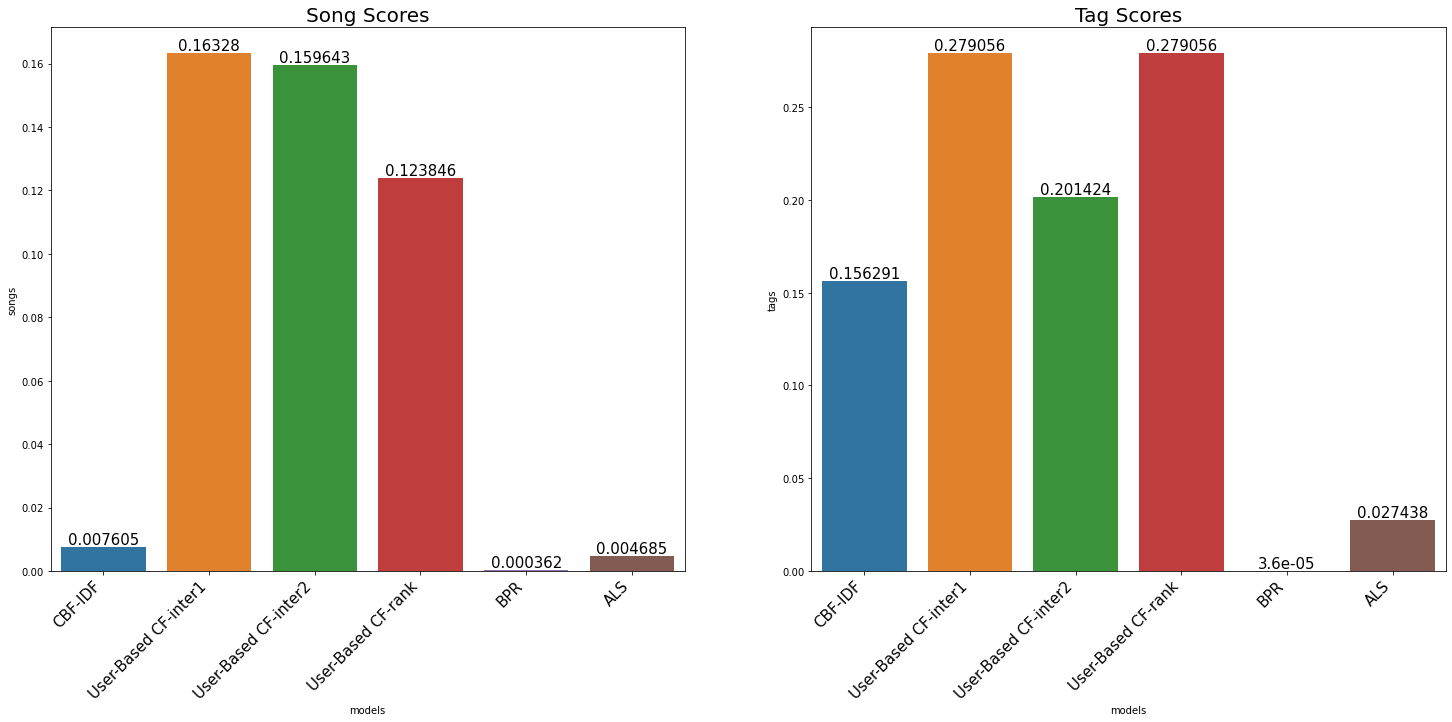

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))
g = sns.barplot(data=results, x='models', y='songs', ax=ax[0])
ax[0].set_title("Song Scores", size=20)
ax[0].set_xticklabels(g.get_xticklabels(), fontsize=15, rotation=45, horizontalalignment='right')

x = results.models
y = results.songs
for i, v in enumerate(x):
    ax[0].text(i, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 15, 
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)


g = sns.barplot(data=results, x='models', y='tags', ax=ax[1])
ax[1].set_title("Tag Scores", size=20)
ax[1].set_xticklabels(g.get_xticklabels(), fontsize=15, rotation=45, horizontalalignment='right')

x = results.models
y = results.tags
for i, v in enumerate(x):
    ax[1].text(i, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 15, 
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()

In [5]:
results['score'] = results.apply(lambda x: 0.85*x['songs']+0.15*x['tags'], axis=1)

No handles with labels found to put in legend.


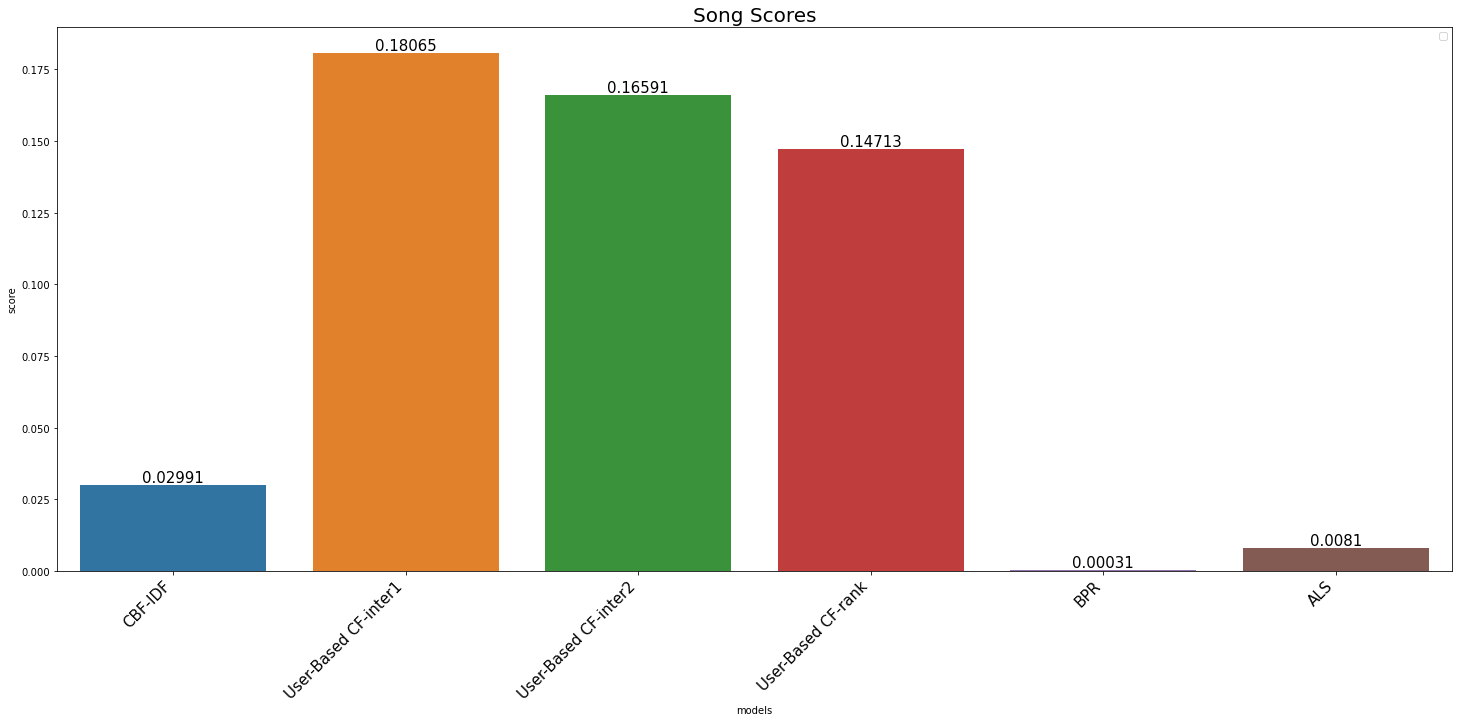

In [7]:
fig, ax = plt.subplots(figsize=(25, 10))
g=sns.barplot(data=results, x='models', y='score', ax=ax)
ax.set_title("Song Scores", size=20)
ax.set_xticklabels(g.get_xticklabels(), fontsize=15, rotation=45, horizontalalignment='right')

x = results.models
y = results.score
for i, v in enumerate(x):
    ax.text(i, y[i], round(y[i],5),                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 15, 
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.legend()

plt.show()

In [52]:
tables = [[0.289624,0.269720,0.402414 ],
[0.284174,0.251201 ,0.471018],
[0.28394,0.250919 ,0.471058],
[0.276863,0.244249 ,0.461677 ],
[0.268129,	0.235251, 	0.454436 ],
[0.267497,	0.238913,	0.429472 ],
[0.267297,	0.234293, 	0.454323 ],
[0.265538,	0.284817, 	0.156291 ],
[0.241663,	0.220567 ,	0.361209 ],
[0.225228,	0.186099 ,	0.446957],
[0.201718,	0.167213 ,	0.397245 ],
[0.186723,	0.159643 ,	0.340179 ],
[0.186076,	0.144917 ,	0.419312],
[0.185924,	0.158814 ,	0.339545 ],
[0.159628,	0.139756 ,	0.272232 ],
[0.144032,	0.111891 ,	0.326161 ],
[0.135999,	0.128315 ,	0.179544 ],
[0.10326,	0.121481 ,	0.000009 ],
[0.059669,	0.041774 ,	0.161075 ],
[0.043449,	0.022692 ,	0.161075 ],
[0.038676,	0.016769 ,	0.162818 ],
[0.038348,	0.016952 ,	0.159589 ],
[0.031618,	0.010085 ,	0.153642 ],
[0.028538,	0.005149 ,	0.161075 ],
[0.025581,	0.000129 ,	0.169805 ],
[0.023846,	0.014775 ,	0.075244 ],
[0.010762,	0.008083 ,	0.025944 ]]

In [57]:
dic = {"score":[]
      ,"song":[]
      ,"tag":[]}
for d in tables:
    dic['score'].append(d[0])
    dic['song'].append(d[1])
    dic['tag'].append(d[2])
    
table = pd.DataFrame(dic)

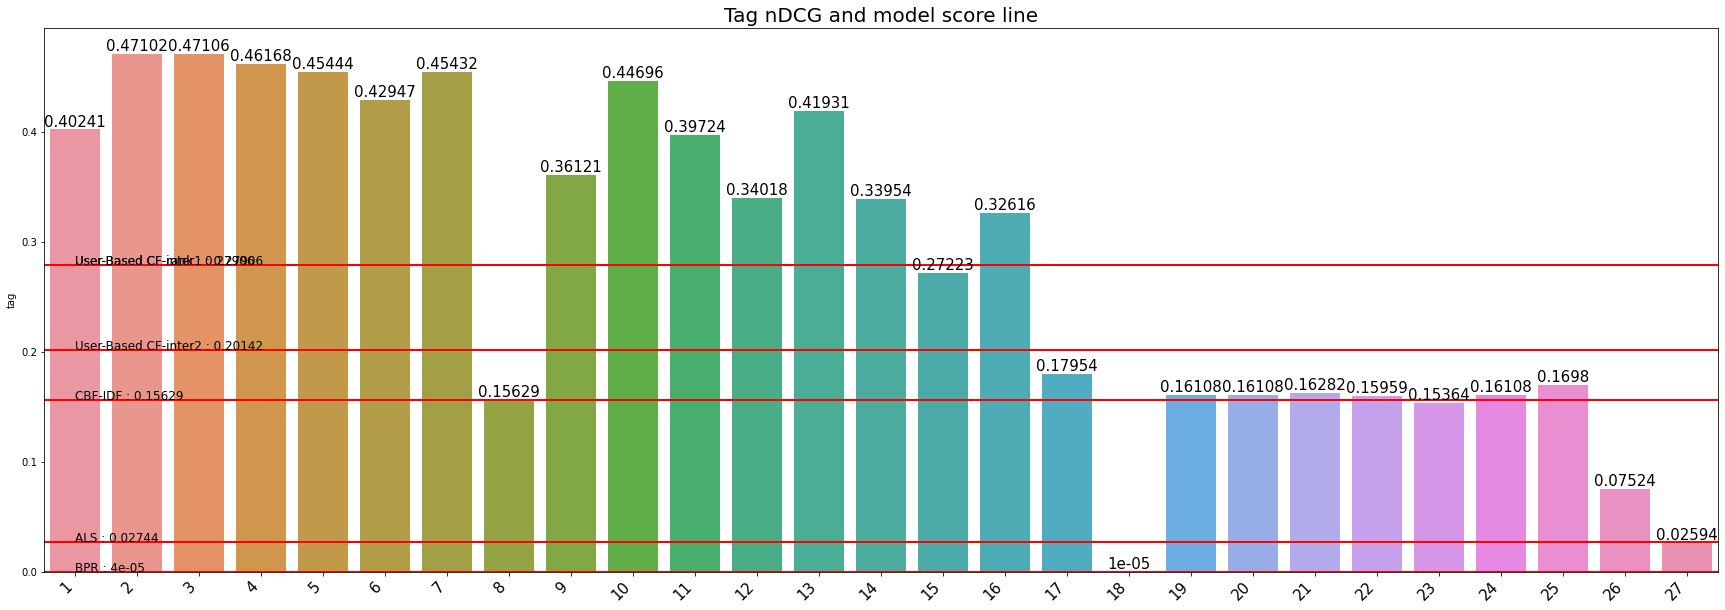

In [80]:
fig, ax = plt.subplots(figsize=(30, 10))
g=sns.barplot(data=table,x=(table.index)+1, y='tag', ax=ax)
ax.set_title("Tag nDCG and model score line", size=20)
ax.set_xticklabels(g.get_xticklabels(), fontsize=15, rotation=45, horizontalalignment='right')

x = table.index
y = table.tag
for i, v in enumerate(x):
    ax.text(i, y[i], round(y[i],5),                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 15, 
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

for data, model in zip(results.tags, results.models):
    ax.axhline(y=data, color='r', linewidth=2)
    ax.text(0, data, model+' : '+str(round(data, 5)), fontsize=12)
    
plt.show()

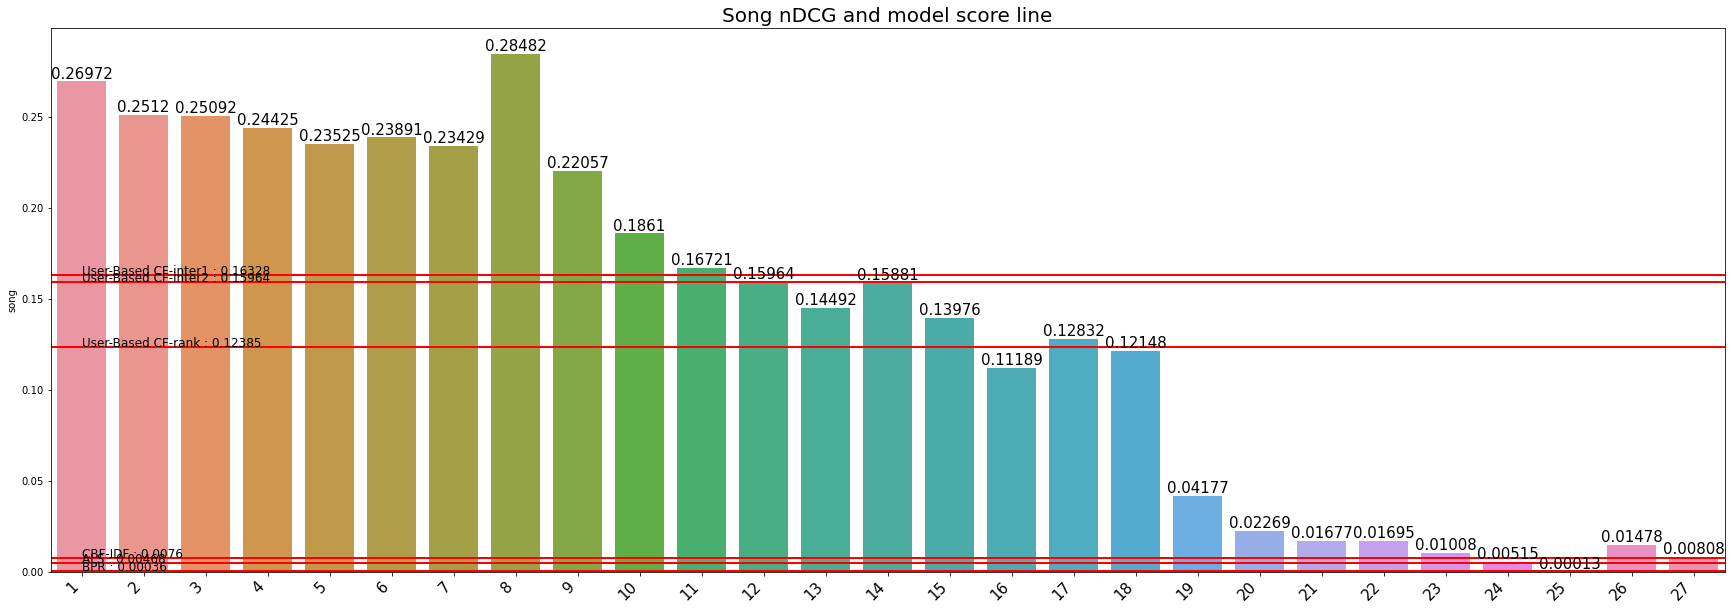

In [78]:
fig, ax = plt.subplots(figsize=(30, 10))
g=sns.barplot(data=table,x=(table.index)+1, y='song', ax=ax)
ax.set_title("Song nDCG and model score line", size=20)
ax.set_xticklabels(g.get_xticklabels(), fontsize=15, rotation=45, horizontalalignment='right')

x = table.index
y = table.song
for i, v in enumerate(x):
    ax.text(i, y[i], round(y[i],5),                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 15, 
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

for data, model in zip(results.songs, results.models):
    ax.axhline(y=data, color='r', linewidth=2)
    ax.text(0, data, model+' : '+str(round(data, 5)), fontsize=12)
    
plt.show()

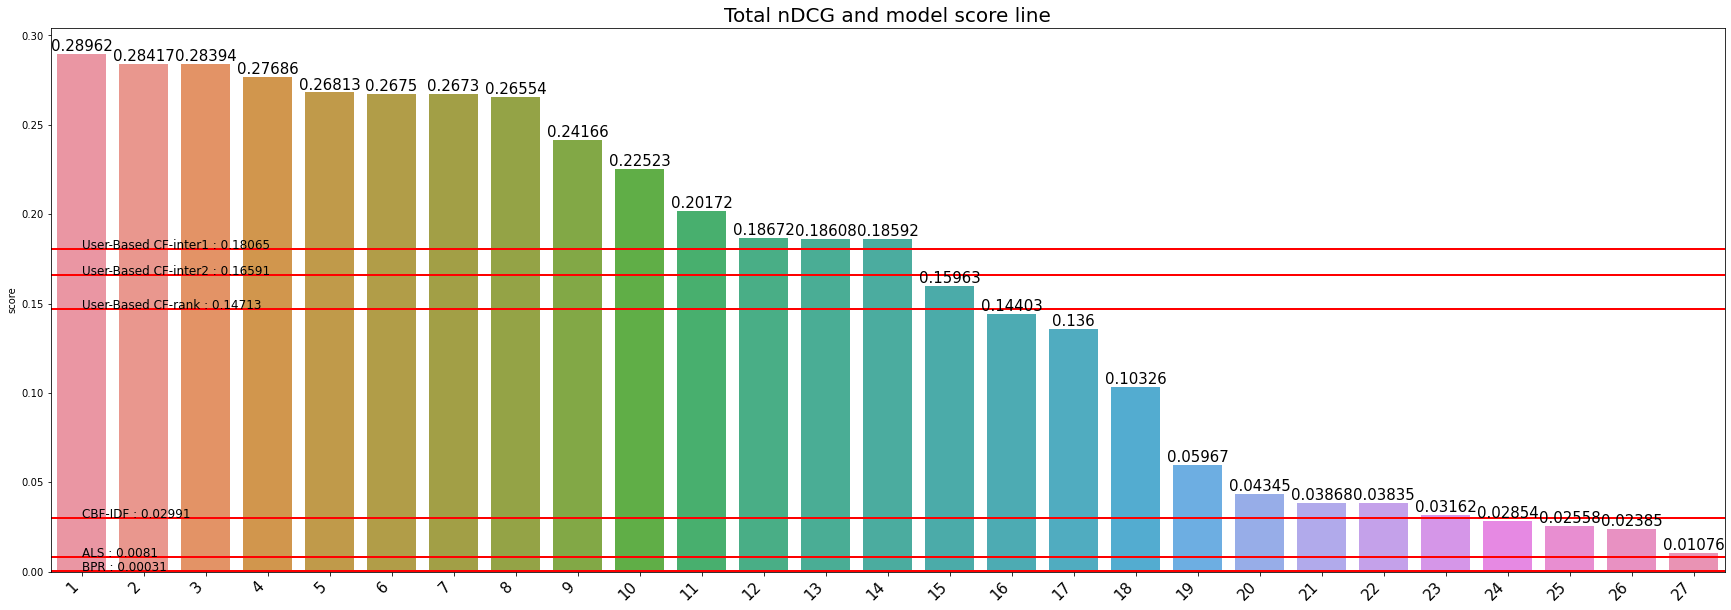

In [79]:
fig, ax = plt.subplots(figsize=(30, 10))
g=sns.barplot(data=table,x=(table.index)+1, y='score', ax=ax)
ax.set_title("Total nDCG and model score line", size=20)
ax.set_xticklabels(g.get_xticklabels(), fontsize=15, rotation=45, horizontalalignment='right')

x = table.index
y = table.score
for i, v in enumerate(x):
    ax.text(i, y[i], round(y[i],5),                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 15, 
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

for data, model in zip(results.score, results.models):
    ax.axhline(y=data, color='r', linewidth=2)
    ax.text(0, data, model+' : '+str(round(data, 5)), fontsize=12)
    
plt.show()